## Image Processing with OpenCV

1. https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html
2. https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing/images_data

/gdrive/My Drive/Colab Notebooks/_Image Processing/images_data


In [4]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]

In [5]:
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

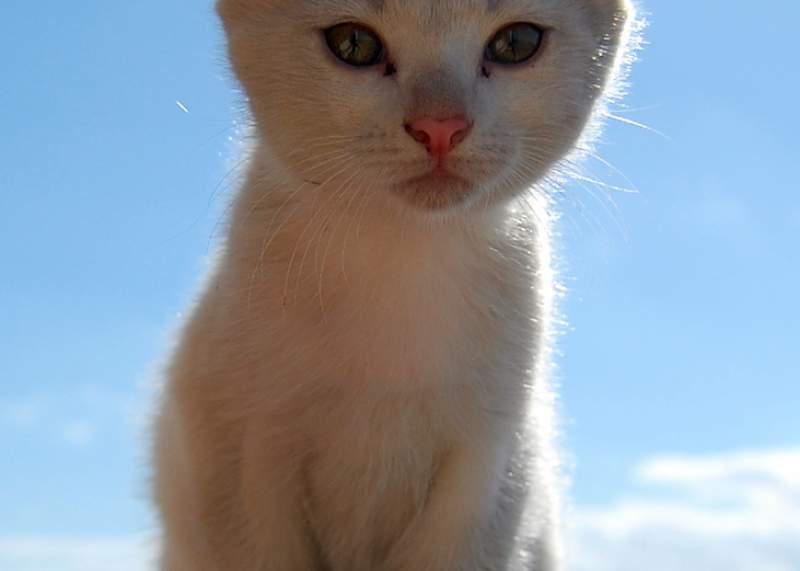

In [15]:
url = 'https://placekitten.com/800/571'
img = io.imread(url)  
cv2_imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [16]:
# Check the image matrix data type (could know the bit depth of the image)
print(img.dtype)
# Check the height of image 
print(img.shape[0])
# Check the width of image 
print(img.shape[1])
# Check the number of channels of the image
print(img.shape[2])

uint8
571
800
3


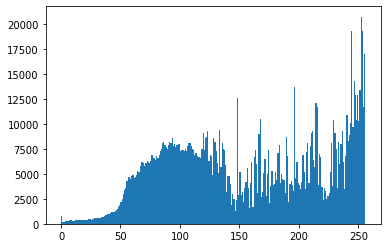

In [17]:
# Generate Histogram of color image and grayscale image

# Display the histogram of all the pixels in the color image

plt.hist(img.ravel(),bins = 256, range = [0,256]) 
plt.show()

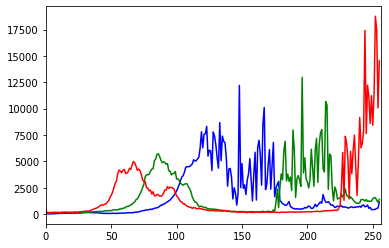

In [18]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

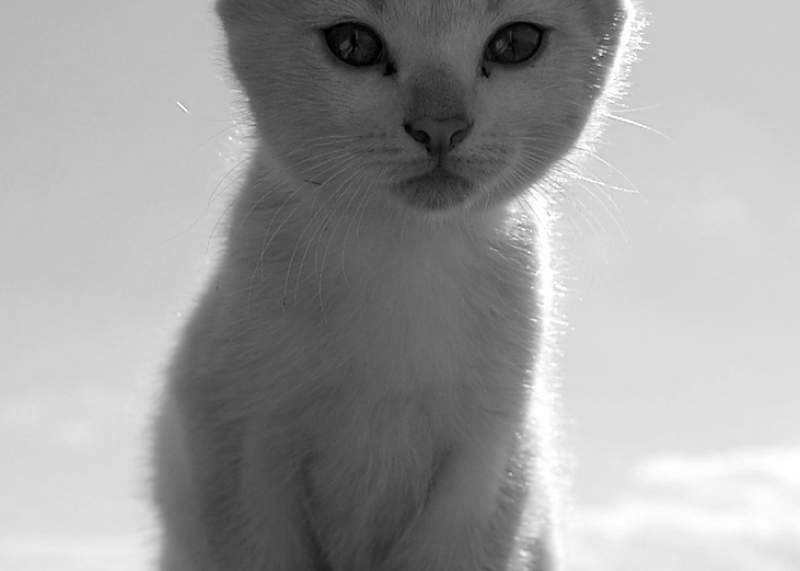

In [19]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

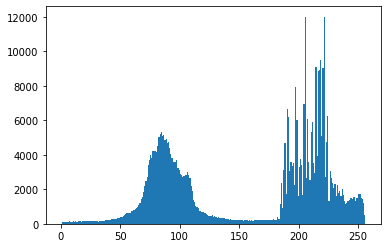

In [20]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### Find image contour of the grayscale image

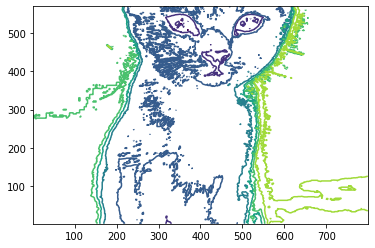

In [21]:
# Method 1 
plt.contour(gray_image, origin = "image")

In [ ]:
# Method 2 - Open CV -> 
## Set threshold for the countour detection
## https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html
## https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/

gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray_image,150,255,cv.THRESH_BINARY)

'''
Thresholding is one of the most common (and basic) segmentation techniques in computer vision and 
it allows us to separate the foreground 
(i.e., the objects that we are interested in) from the background of the image.
'''

im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img, contours, -1, (0, 255, 0), 3)

plt.imshow(image)

### Grayscale Transform and Histogram Equalization

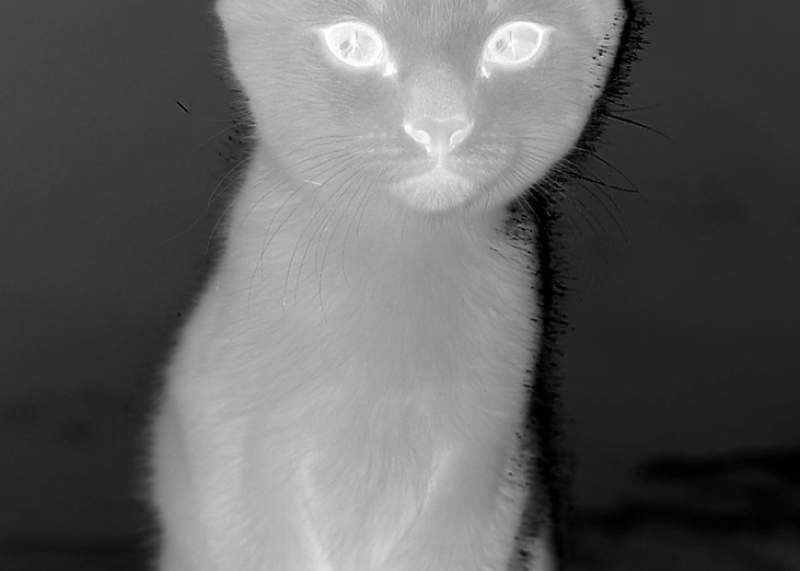

In [36]:
# Grayscale Transformation

# This is an inverse operation of the grayscale image
# the bright pixels become dark, and the dark pixels become bright

im2 = 255 - gray_image
cv2_imshow(im2)

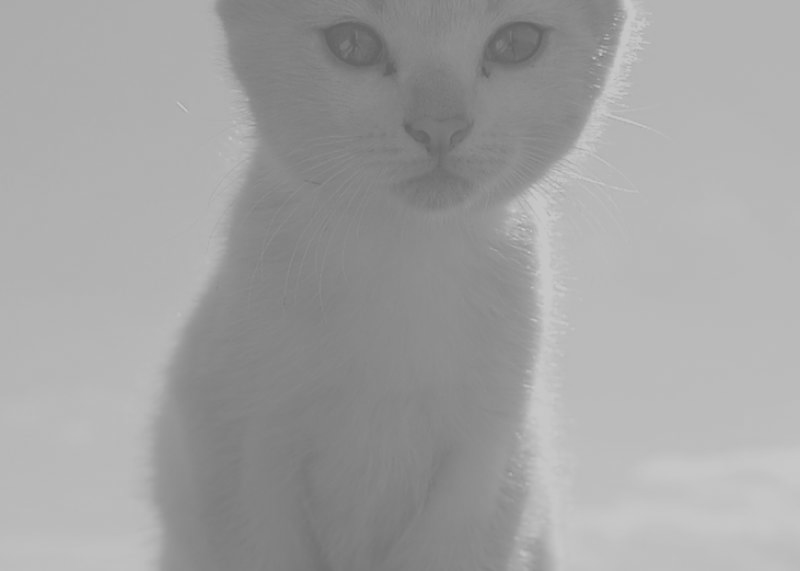

In [37]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

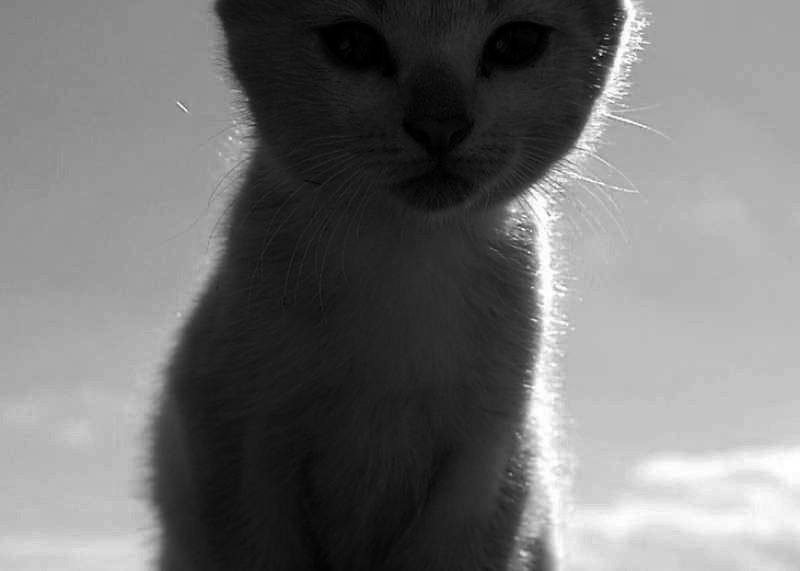

In [38]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

This section demonstrates the histogram quealization on a dark image. This transform flattens the graylevel histogram so that all intensities are as equally common as possible. 

The transform function is, a cumulative distribution function(cdf) of the pixel values in the image(normalized to map the range of pixel values to the desired range). 


In [39]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])

  cdf = imhist.cumsum() # cumulative distribution function
  
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  
  cdf_mask = np.ma.masked_equal(cdf, 0)
  
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  
  return cdf[im.astype('uint8')]



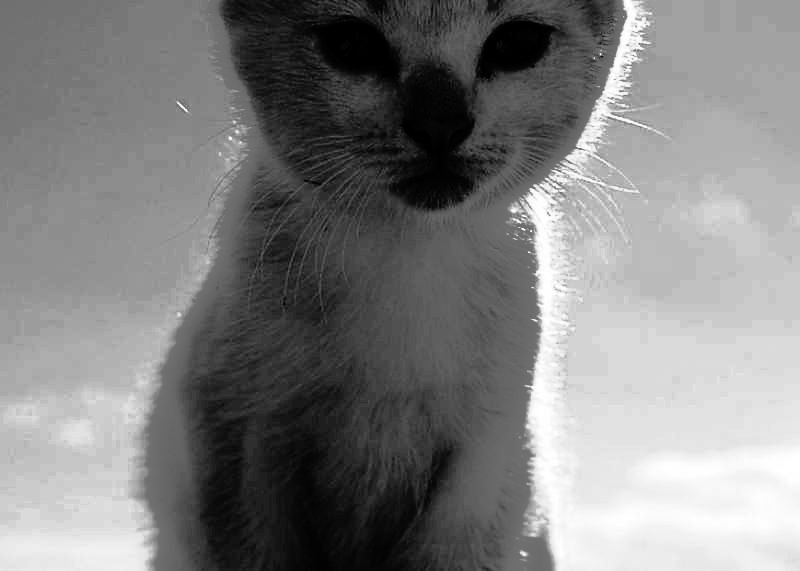

In [40]:
# apply the function on dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

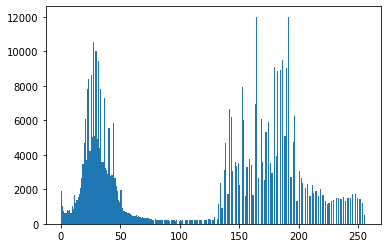

In [41]:
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

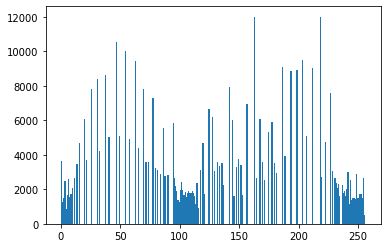

In [42]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

### Fourier Transform of Gray Images

Fourier transform is to find the frequency domian of an image. 

Consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image. 

For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. 

Edges and noises are high frequency contents in an image because they change drastically in images.

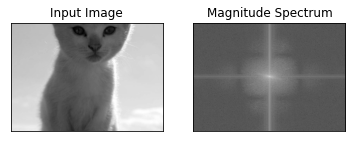

In [43]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))

# Transform the image to frequency domain
f = np.fft.fft2(imBlur)

# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Finding Edges by Highpass Filtering in FFT

This section conduct high pass filtering to remove the low frequency component, resulting in a sharpening image which contains the edges

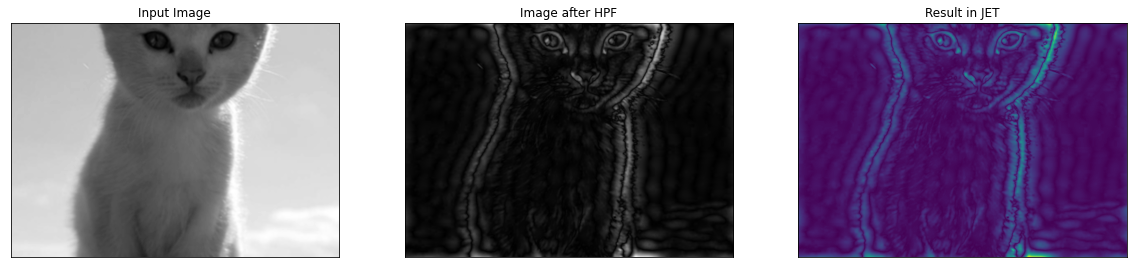

In [44]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)

# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()